# 인공신경망 기본개념 + XOR 문제 (PyTorch) ch6-1~5

### Sample(샘플)과 Feature(특성)

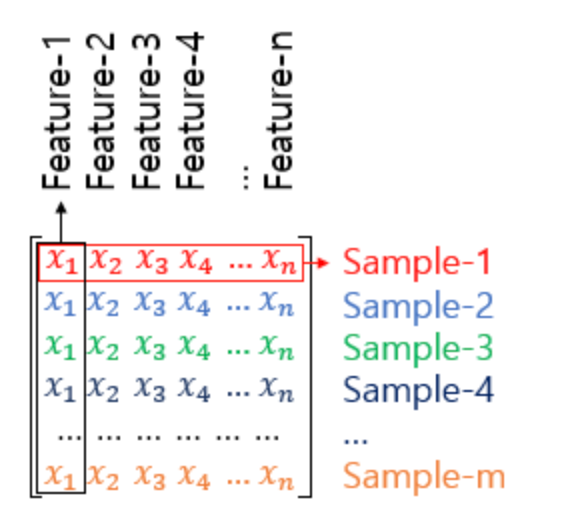

In [9]:
from IPython.display import Image
Image("sample_feature.png",width=200,height=200)

배우는 이유? - 
하나의 행을 Sample(샘플), 종속 변수 y를 예측하기 위한 각각의 독립 변수 x를 Feature(특성)이라고 합니다.

### Confusion Matrix(혼동행렬)

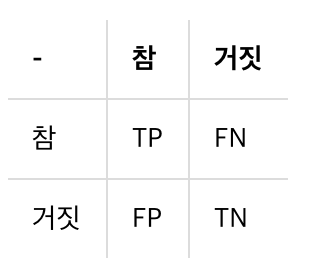

In [41]:
from IPython.display import Image
Image("confusion_matrix.png",width=150,height=200)

배우는 이유? - 정확도는 맞춘 결과와 틀린 결과에 대한 세부적인 내용을 보지못해

- TP: True Positive -> TP는 양성(Postive)이라고 대답하였고 실제로 양성이라서 정답
- TN: True Negative -> TN은 음성(Negative)이라고 대답하였는데 실제로 음성이라서 정답을 맞춘 경우입니다.
- FP: False Positive -> FP는 양성이라고 대답하였는데, 음성이라서 정답을 틀린 경우
- FN: False Negative -> FN은 음성이라고 대답하였는데 양성이라서 정답을 틀린 경우

### Precision(정밀도)

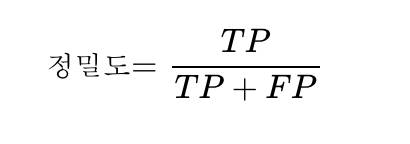

In [42]:
from IPython.display import Image
Image("precision.png",width=175,height=200)

모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
예) 날씨 예측 모델이 맑다는 예측했는데, 실제 날씨가 맑았는지를 살펴볼 수 있음

### Recall(재현률)

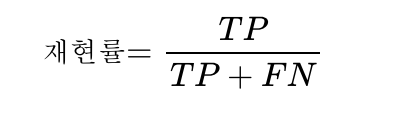

In [43]:
from IPython.display import Image
Image("recall.png",width=175,height=200)

실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
예) 실제로 날씨가 맑았는데, 날씨 예측 모델이 맑다고 예측

- FP를 줄여서 precision을 100%할 수 도 있지만, 이상적인 모델이 아님
- precision과 recall을 함께 고려하여 실제 맑은 날들의 입장에서 우리의 모델이 맑다고
  예측한 비율을 함께 고려. 

### Overfitting(과적합)과 Underfitting(과소적합)

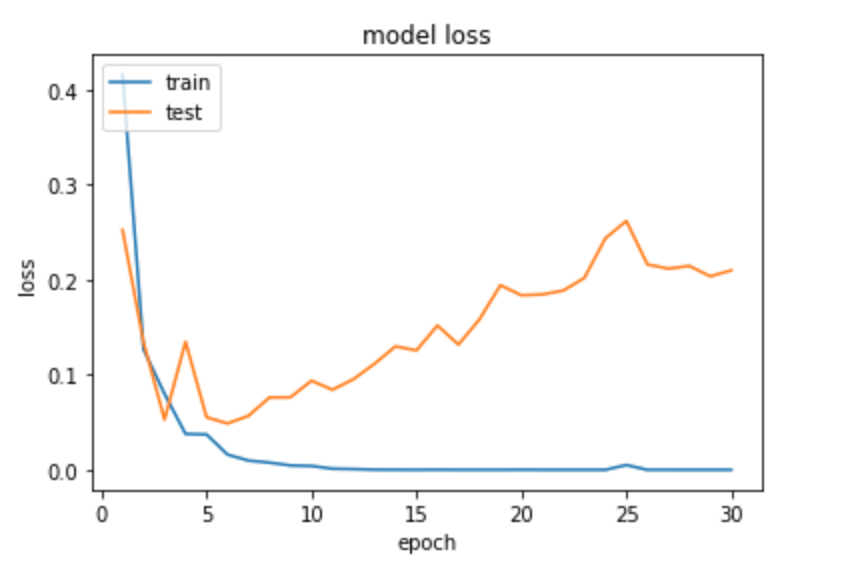

In [13]:
from IPython.display import Image
Image("un_overfitting.png",width=350,height=200)

overfitting - traning data를 과하게 학습한 경우. 과적합 상태에서는 훈련 데이터에 대한 오차는 낮지만 테스트 데이터에서는 높음

underfitting - test data의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태를 반대로 과소적합이라고 함.

fitting - 모델이 주어진 데이터에 대해서 적합해져가는 과정

과적합을 막기위해서 Dropout(드롭아웃), Early Stopping(조기 종료) 몇 가지 방법이 존재. 

### Single-Layer Perceptron(단층 퍼셉트론)

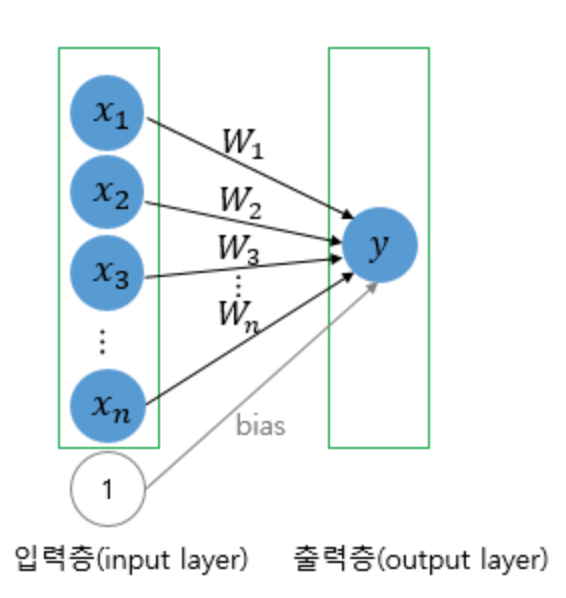

In [16]:
from IPython.display import Image
Image("single_perceptron.png",width=250,height=200)

### 단층 퍼셉트론을 이용한 AND, NAND, OR 게이트 구현

In [ ]:
단층 퍼셉트론으로 게이트를 쉽게 구현 할 수 있음. 

#### AND

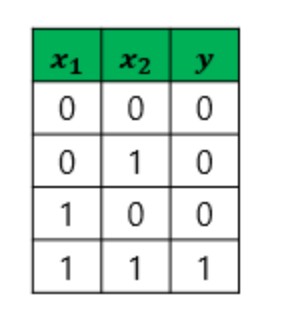

In [19]:
from IPython.display import Image
Image("AND.png",width=150,height=150)

두개의 입력값이 모두 1인 경우에만 출력값이 1이 나오는 구조

In [33]:
def AND_gate(x1,x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.8
    
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [34]:
AND_gate(0,0), AND_gate(0,1), AND_gate(1,0), AND_gate(1,1)

(0, 0, 0, 1)

#### NAND

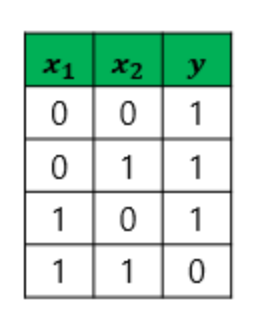

In [37]:
from IPython.display import Image
Image("NAND.png",width=150,height=150)

두 개의 입력값이 1인 경우에만 출력값이 0, 나머지 입력값의 쌍(pair)에 대해서는 모두 출력값이 1

In [38]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [39]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

#### OR

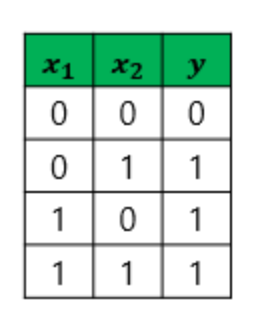

In [40]:
from IPython.display import Image
Image("OR.png",width=150,height=150)

두 개의 입력값이 모두 0인 경우 출력값이 0이고, 나머지 경우에는 모두 출력값이 1

In [44]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [45]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

### 단층 퍼셉트론으로는 XOR 게이트를 구현 할 수 없다

XOR 게이트 - 입력값 두 개가 서로 다른 값을 갖고 있을때만 출력값이 1이 되고, 입력값 두 개가 서로 같으면 출력값이 0

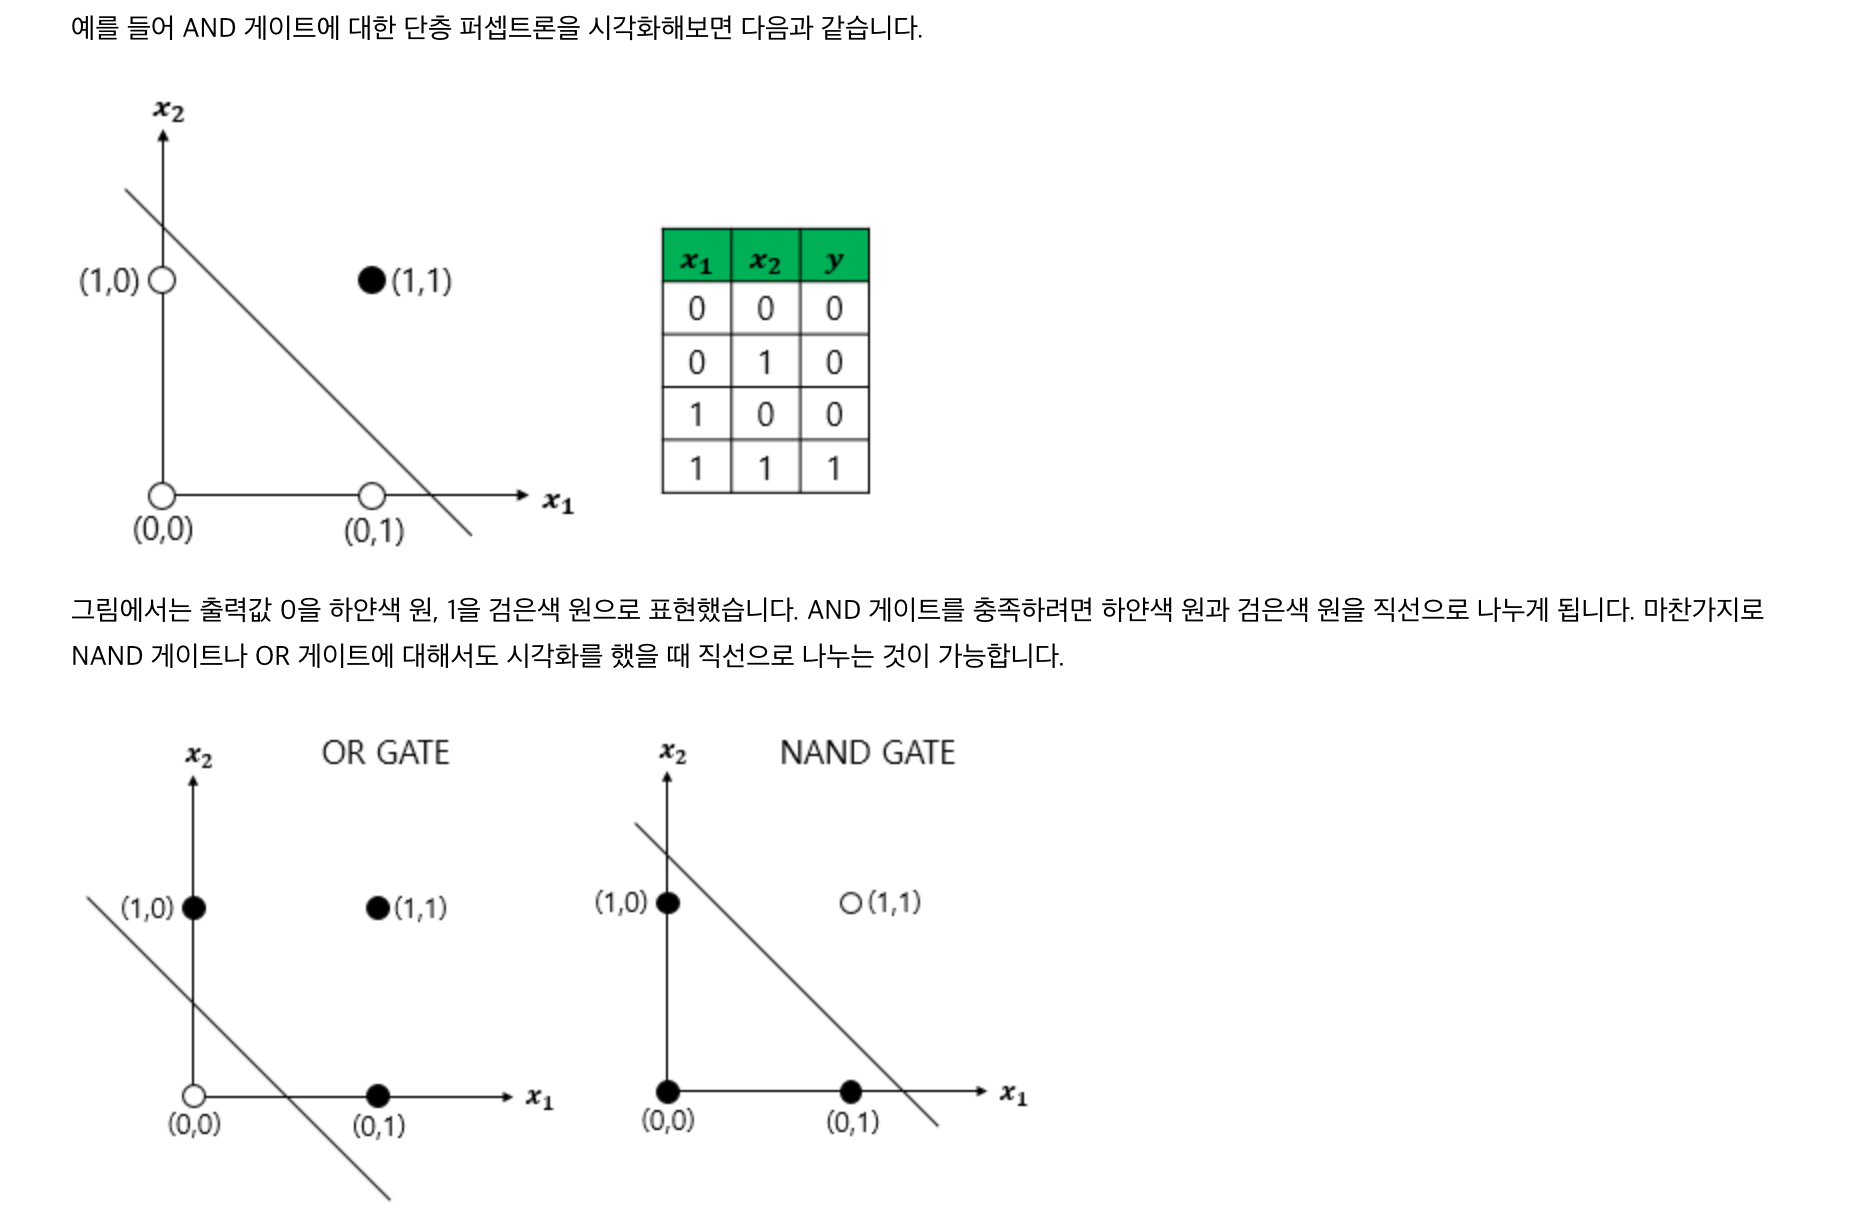

In [52]:
from IPython.display import Image
Image("AND_mat.png",width=700,height=300)

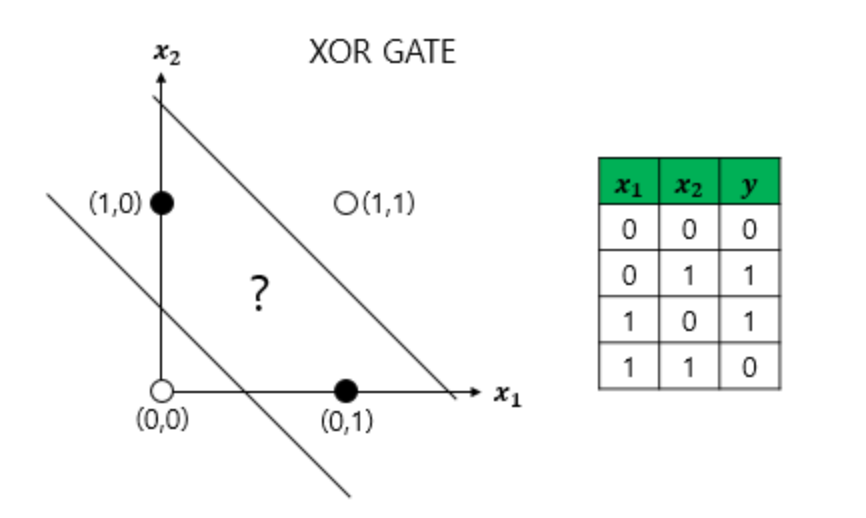

In [54]:
from IPython.display import Image
Image("XOR_mat.png",width=400,height=300)

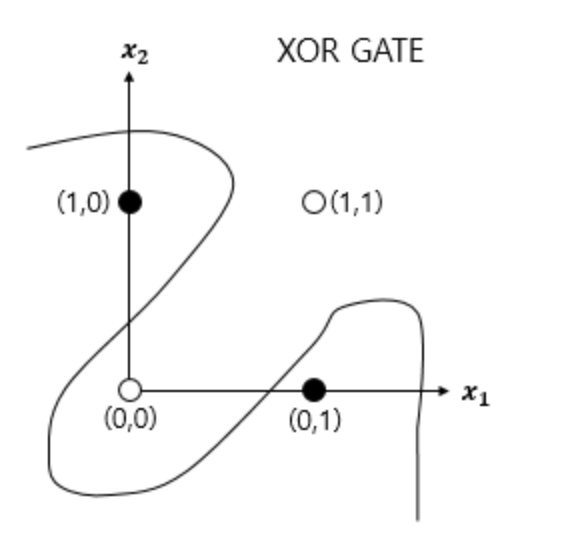

In [57]:
from IPython.display import Image
Image("XOR_nonlinear.png",width=300,height=300)

### MultiLayer Perceptron, MLP(다층 퍼셉트론)

단층 퍼셉트론과 다층 퍼셉트론의 차이점은 은닉층이 존재하고 안한다는 점

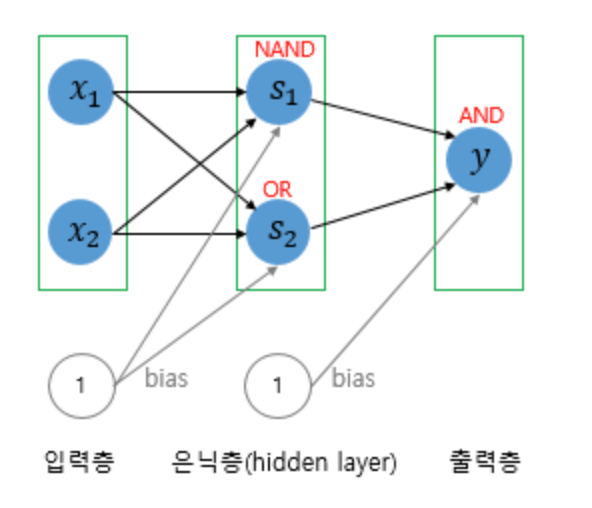

In [65]:
from IPython.display import Image
Image("multilayer_perceptron.png",width=350,height=300)

In [62]:
# NAND와 OR로 x1과 x2값을 넣고 나온 결과를 다시 y에 넣는 2층 구조의 퍼셉트론
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y = AND_gate(s1, s2)
    return y

In [63]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

### Pytorch XOR

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [4]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), 
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), 
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), 
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), 
          nn.Sigmoid()
          ).to(device)


In [5]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  

In [10]:
for epoch in range(100):
    optimizer.zero_grad()
   
    hypothesis = model(X)

    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.00015611713752150536


In [11]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('')
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('')
    print('실제값(Y): ', Y.cpu().numpy())
    print('')
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.0893232e-04]
 [9.9983323e-01]
 [9.9984646e-01]
 [1.8088125e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


https://wikidocs.net/61010